# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

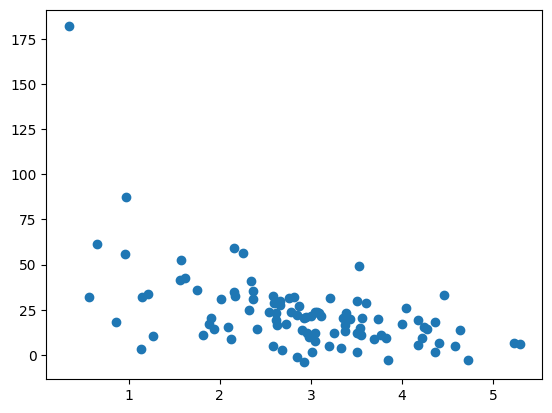

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [2]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

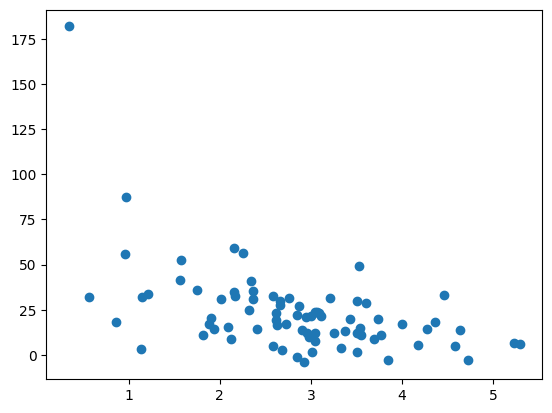

In [3]:
scatter(trainX, trainY)

And our test dataset:

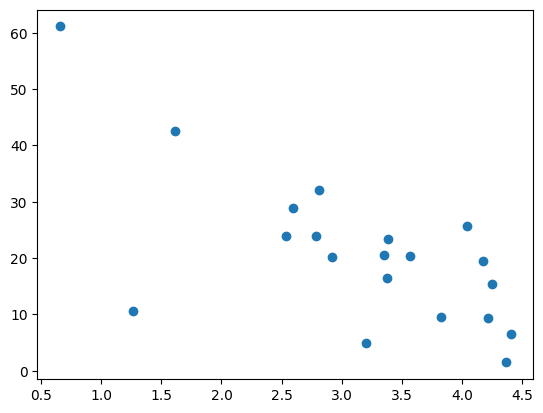

In [4]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [5]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

In [6]:
p4

poly1d([ 7.33969942e-01, -1.70081294e+01,  1.65678509e+02, -8.81872511e+02,
        2.78786769e+03, -5.31459764e+03,  5.89781142e+03, -3.44223082e+03,
        8.38386490e+02])

Let's plot our polynomial against the training data:

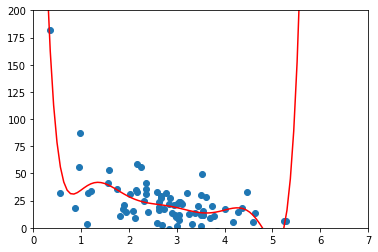

In [6]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

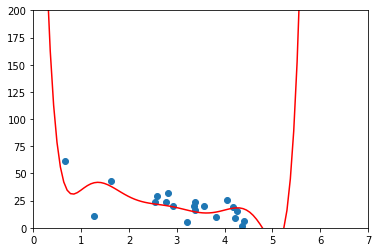

In [7]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.3001816861141787


...even though it fits the training data better:

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.6427069514694241


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

In [12]:
# for NumPy > 1.4.
from numpy.polynomial import Polynomial
p4p = Polynomial(Polynomial.fit(x, y, 8))

In [16]:
from sklearn.metrics import r2_score

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial_fit(x, y, degree):
    polynomial_fit_res = np.polynomial.Polynomial.fit(x, y, degree)
    print(f'degree={degree}')
    return polynomial_fit_res

def plot_fit( x, y,
             polynomial_fit,
             str_prefix=""):
    
    xp = np.linspace(0, 7, 100)
    fit_values = polynomial_fit(xp)
    
    axes = plt.axes()
    axes.set_xlim([0,7])
    axes.set_ylim([0, 200])
    plt.scatter(x, y)
    plt.plot(xp, fit_values, c='r')
    plt.show()
    
    residuals = y - polynomial_fit(x)
    ssr = np.sum(residuals ** 2)
    sst = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ssr / sst)
    print(f'{str_prefix} r2={r2}')
    return r2

In [28]:
# seperate train and test data for pageSpeeds as x and purchaseAmount as y
dic_data = {
    "train":{
        "x":pageSpeeds[:80],
        "y":purchaseAmount[:80]
    },
    "test":{
        "x":pageSpeeds[80:],
        "y":purchaseAmount[80:]
    }
}
# trainX = dic_data["train"]["x"]
# testX = dic_data["test"]["x"]
# trainY = dic_data["train"]["y"]
# testY = dic_data["test"]["y"]

In [31]:
arr_deg = [ deg for deg in range(4, 7)]

degree=4


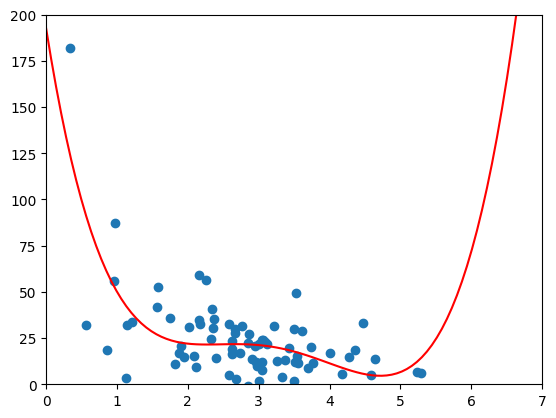

train  r2=0.4831221655972038


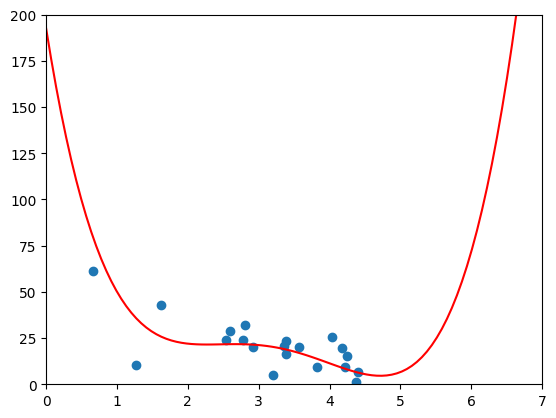

test  r2=0.39362692609903893
degree=5


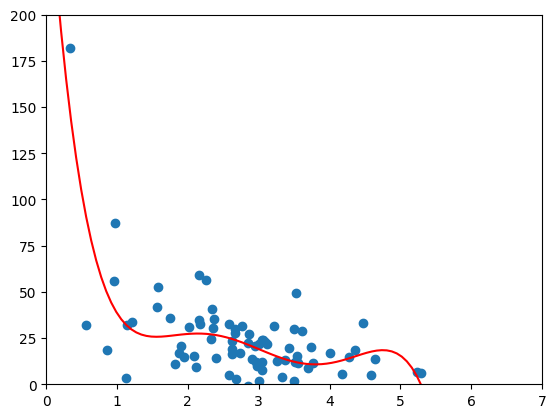

train  r2=0.5544872536567724


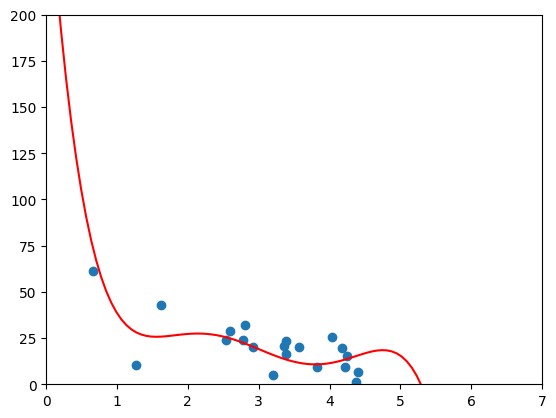

test  r2=0.5040723897194272
degree=6


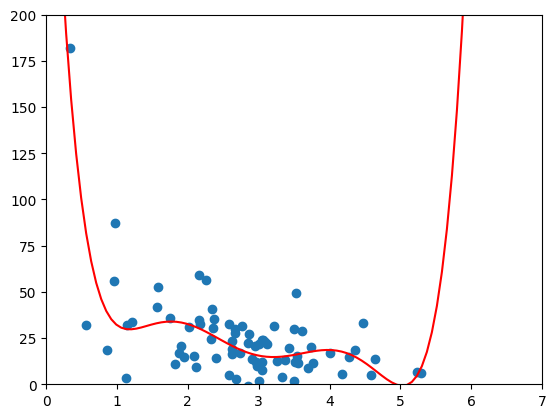

train  r2=0.6025441707110473


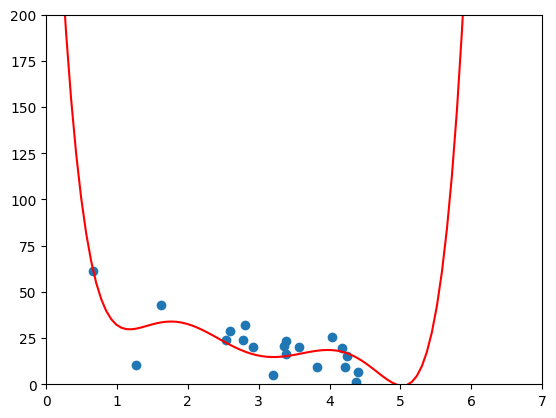

test  r2=0.6050119470357108


In [33]:
arr_r2_train = []
arr_r2_test = []
for i in range(len(arr_deg)):
  _deg = arr_deg[i]
  _polynomial_fit_res = polynomial_fit(
    dic_data["train"]["x"], 
    dic_data["train"]["y"], 
    _deg)
  _r2_train = plot_fit(
    dic_data["train"]["x"],
    dic_data["train"]["y"],
    _polynomial_fit_res,
    "train "
  )  
  arr_r2_train.append(_r2_train)
  
  _r2_test = plot_fit(
    dic_data["test"]["x"],
    dic_data["test"]["y"],
    _polynomial_fit_res,
    "test "
  )
  arr_r2_test.append(_r2_test)